<a href="https://colab.research.google.com/github/baeksumin/k-project/blob/main/machinelearning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torch.optim as optim
from google.colab import drive
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/[Shared]K-Project/data/mktcap_top10/KR7006840003.csv')

In [4]:
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,2021/12/30,0,0,0,0,0,NaN
1,2021/12/29,0,0,0,0,0,NaN
2,2021/12/28,0,0,0,0,0,NaN
3,2021/12/27,0,0,0,0,0,NaN
4,2021/12/24,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...
5525,1999/08/17,0,0,1,0,0,NaN
5526,1999/08/16,0,0,1,1,0,NaN
5527,1999/08/13,0,0,1,1,0,NaN
5528,1999/08/12,0,0,1,1,0,NaN


In [5]:
data[data['MAP_sig'] == -1]

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
234,2021/01/21,0,0,-1,-1,0,0.183673
267,2020/12/02,0,0,1,-1,0,-0.555556
268,2020/12/01,0,0,1,-1,0,-0.777778
269,2020/11/30,0,0,1,-1,0,-1.000000
430,2020/04/06,0,0,1,-1,0,-0.100000
431,2020/04/03,0,0,1,-1,0,-0.250000
439,2020/03/24,0,-1,1,-1,0,-0.750000
440,2020/03/23,0,-1,1,-1,-1,-0.800000
442,2020/03/19,0,-1,1,-1,0,-1.000000
1380,2016/05/24,0,0,-1,-1,0,0.250000


In [6]:
data['TREND'].isnull().sum()

24

In [7]:
data['TREND'] = data['TREND'].fillna(0)

In [8]:
data.isnull().sum()

TRD_DD     0
GDC_sig    0
RSI_sig    0
ROC_sig    0
MAP_sig    0
STC_sig    0
TREND      0
dtype: int64

In [9]:
data[0.1 < data['TREND']]

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
17,2021/12/07,0,0,0,0,0,1.000000
18,2021/12/06,0,0,0,0,0,0.714286
58,2021/10/08,0,0,0,0,0,0.164835
59,2021/10/07,0,0,0,0,0,0.186813
60,2021/10/06,0,0,0,0,0,0.208791
...,...,...,...,...,...,...,...
5508,1999/09/09,0,0,-1,0,0,0.555556
5509,1999/09/08,0,0,-1,0,0,0.444444
5510,1999/09/07,0,0,-1,0,0,0.333333
5511,1999/09/06,0,0,-1,0,0,0.222222


In [10]:
#최신 데이터가 뒤로 오도록 정렬
data = data.sort_values(by=['TRD_DD'])
data.set_index('TRD_DD',drop=True,inplace=True)
data.reset_index('TRD_DD',drop=False,inplace=True)
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,1999/08/11,0,0,-1,1,0,0.0
1,1999/08/12,0,0,1,1,0,0.0
2,1999/08/13,0,0,1,1,0,0.0
3,1999/08/16,0,0,1,1,0,0.0
4,1999/08/17,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...
5525,2021/12/24,0,0,0,0,0,0.0
5526,2021/12/27,0,0,0,0,0,0.0
5527,2021/12/28,0,0,0,0,0,0.0
5528,2021/12/29,0,0,0,0,0,0.0


In [11]:
# data.set_index('TRD_DD', drop=True, inplace=True)
# data

In [12]:
Y_colname = ['TREND'] #종속변수
X_remove = ['TRD_DD']
X_colname = [x for x in data.columns if x not in Y_colname + X_remove] #입력변수들
X_colname

['GDC_sig', 'RSI_sig', 'ROC_sig', 'MAP_sig', 'STC_sig']

In [13]:
def datasplit(df, Y_colname, X_colname): #데이터 분리 함수
  df_train = df.loc[0 : round(len(df) * 0.75)] 
  df_test = df.loc[round(len(df) * 0.75) + 1 : ]
  Y_train = df_train[Y_colname]
  X_train = df_train[X_colname]
  Y_test = df_test[Y_colname]
  X_test = df_test[X_colname]
  return X_train, X_test, Y_train, Y_test

In [14]:
X_train, X_test, Y_train, Y_test = datasplit(data, Y_colname, X_colname)

In [15]:
print('X_train :', X_train.shape, 'Y_train :', Y_train.shape) 
print('X_test :', X_test.shape, 'Y_test :', Y_test.shape)

X_train : (4149, 5) Y_train : (4149, 1)
X_test : (1381, 5) Y_test : (1381, 1)


In [16]:
Y_train

,TREND
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
4144,-0.333333
4145,-0.250000
4146,-0.166667
4147,-0.083333


Elasticnet

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

In [18]:
elasticnet= ElasticNet(alpha=0.3, l1_ratio=0.7).fit(X_train, Y_train)

In [19]:
print("훈련 세트 점수: {: .2f}", format(elasticnet.score(X_train, Y_train)))
print("테스트 세트 점수: {: .2f}", format(elasticnet.score(X_test, Y_test)))

#output :

훈련 세트 점수: {: .2f} 0.0
테스트 세트 점수: {: .2f} -7.936749723036485e-05


In [21]:
#Ridage Regression
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


ridge = Ridge()
alphas = np.logspace(-4, 0, 200)
parameters = {'alpha': alphas }
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_test,Y_test)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 1.0}
-0.3366873160860143


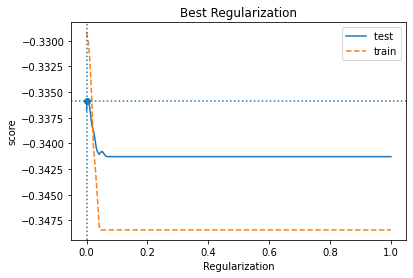

In [23]:
## lasso
alphas = np.logspace(-4, 0, 200)

train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(Y_train, model.fit(X_train, Y_train).predict(X_train))
    test_score = np.mean(cross_val_score(model, X_test, Y_test, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)
optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, "-", label="test ")
plt.plot(alphas, train_scores, "--", label="train")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("Best Regularization")
plt.ylabel('score')
plt.xlabel('Regularization')
plt.legend()
plt.show()

In [24]:
lasso = Lasso()
alphas = np.logspace(-4, 0, 200)
parameters = {'alpha': alphas }
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,Y_train)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.0018464249428955426}
-0.3309519353277759


In [26]:
elasticnet = ElasticNet()
alphas = np.logspace(-4, 0, 200)
parameters = {'alpha': alphas }

elasticnet_reg = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5)
elasticnet_reg.fit(X_train,Y_train)
print(elasticnet_reg.best_params_)
print(elasticnet_reg.best_score_)

{'alpha': 0.003072112998861759}
-0.3309688003456507
